In [1]:
import os
import random
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from himalaya.backend import set_backend
from matplotlib import pyplot as plt
import simplstyles

from residual_method import residual_method
from dataset import generate_dataset
from variance_partitioning import variance_partitioning

In [2]:
def get_path():
    path = os.path.join("results", "varying dimensions")
    os.makedirs(path, exist_ok=True)
    return path

In [3]:
def save_scores(d_list_list, n_samples=20000, n_samples_train=10000):
    path = get_path()
    for d_list in d_list_list:
        print(d_list)
        csv_path = os.path.join(path, f"scores_{d_list}.csv")
        scores = pd.DataFrame()
        if os.path.exists(csv_path):
            print("skipping, already exists")
            continue
        Xs, Y = generate_dataset(d_list=d_list, n_samples=n_samples)
        print("data generated")
        x1_score, x2_score, joint_score, x1_and_x2_score, vp_x1_unique_score, vp_x2_unique_score = variance_partitioning(
            Xs, Y, n_samples_train)
        print("variance partitioning done")

        scores["x1_score"] = x1_score
        scores["x2_score"] = x2_score
        scores["vp_joint_score"] = joint_score
        scores["vp_shared_score"] = x1_and_x2_score
        scores["vp_x1_unique_score"] = vp_x1_unique_score
        scores["vp_x2_unique_score"] = vp_x2_unique_score
        del x1_score, x2_score, joint_score, x1_and_x2_score, vp_x1_unique_score, vp_x2_unique_score

        x2_to_x1_score, x1_to_x2_score, rm_x1_unique_score, rm_x2_unique_score = residual_method(
            Xs, Y, n_samples_train)
        print("residual method done")
        scores["rm_x2_to_x1_score"] = np.concatenate(
            [x2_to_x1_score, np.full(len(rm_x1_unique_score) - len(x2_to_x1_score), np.nan)])
        scores["rm_x1_to_x2_score"] = np.concatenate(
            [x1_to_x2_score, np.full(len(rm_x1_unique_score) - len(x1_to_x2_score), np.nan)])
        scores["rm_x1_unique_score"] = rm_x1_unique_score
        scores["rm_x2_unique_score"] = rm_x2_unique_score
        del x2_to_x1_score, x1_to_x2_score, rm_x1_unique_score, rm_x2_unique_score

        # ridge residual
        x2_to_x1_ridge_score, x1_to_x2_ridge_score, rm_ridge_x1_unique_score, rm_ridge_x2_unique_score = residual_method(
            Xs, Y, n_samples_train, use_ols=False)
        print("residual method done")
        scores["rm_ridge_x2_to_x1_score"] = np.concatenate(
            [x2_to_x1_ridge_score, np.full(len(rm_ridge_x1_unique_score) - len(x2_to_x1_ridge_score), np.nan)])
        scores["rm_ridge_x1_to_x2_score"] = np.concatenate(
            [x1_to_x2_ridge_score, np.full(len(rm_ridge_x1_unique_score) - len(x1_to_x2_ridge_score), np.nan)])
        scores["rm_ridge_x1_unique_score"] = rm_ridge_x1_unique_score
        scores["rm_ridge_x2_unique_score"] = rm_ridge_x2_unique_score
        del x2_to_x1_ridge_score, x1_to_x2_ridge_score, rm_ridge_x1_unique_score, rm_ridge_x2_unique_score

        del Xs, Y
        scores.to_csv(csv_path, index=False)

# Save scores for varying Dimensions

In [4]:
backend = set_backend("torch_cuda", on_error="warn")
warnings.filterwarnings("ignore")
random.seed(42)
plt.style.use('nord-light-talk')

In [5]:
d_list = [100, 100, 100]

In [6]:
varying_dim = np.logspace(1, 3, 20, dtype=int)
varying_dim = list(map(int, varying_dim))

# Shared dimension

In [7]:
d_list_list = [[dim, d_list[1], d_list[2]] for dim in varying_dim]

In [8]:
save_scores(d_list_list)

[10, 100, 100]
skipping, already exists
[12, 100, 100]
skipping, already exists
[16, 100, 100]
skipping, already exists
[20, 100, 100]
skipping, already exists
[26, 100, 100]
skipping, already exists
[33, 100, 100]
skipping, already exists
[42, 100, 100]
skipping, already exists
[54, 100, 100]
skipping, already exists
[69, 100, 100]
skipping, already exists
[88, 100, 100]
skipping, already exists
[112, 100, 100]
skipping, already exists
[143, 100, 100]
skipping, already exists
[183, 100, 100]
skipping, already exists
[233, 100, 100]
skipping, already exists
[297, 100, 100]
skipping, already exists
[379, 100, 100]
skipping, already exists
[483, 100, 100]
skipping, already exists
[615, 100, 100]
skipping, already exists
[784, 100, 100]
skipping, already exists
[1000, 100, 100]
skipping, already exists


In [9]:
vp_shared = pd.DataFrame()
rm_shared = pd.DataFrame()
rm_shared_ridge = pd.DataFrame()

for i, dim in enumerate(varying_dim):
    shared_dims = [dim, d_list[1], d_list[2]]
    csv_path = os.path.join(get_path(), f"scores_{shared_dims}.csv")
    if not os.path.exists(csv_path):
        print("skipping, file does not exist")
        continue

    scores = pd.read_csv(os.path.join(get_path(), f"scores_{shared_dims}.csv"))

    vp_shared_scores = pd.DataFrame({
        'shared_dim': [dim] * len(scores),
        'vp_x1_unique_score': scores['vp_x1_unique_score'],
    }, index=range(len(scores)))
    rm_shared_scores = pd.DataFrame({
        'shared_dim': [dim] * len(scores),
        'rm_x1_unique_score': scores['rm_x1_unique_score'],
    }, index=range(len(scores)))
    rm_shared_ridge_scores = pd.DataFrame({
        'shared_dim': [dim] * len(scores),
        'rm_ridge_x1_unique_score': scores['rm_ridge_x1_unique_score'],
    })

    vp_shared = pd.concat([vp_shared, vp_shared_scores], ignore_index=True)
    rm_shared = pd.concat([rm_shared, rm_shared_scores], ignore_index=True)
    rm_shared_ridge = pd.concat([rm_shared_ridge, rm_shared_ridge_scores], ignore_index=True)
rm_shared

,shared_dim,rm_x1_unique_score
0,10,0.277787
1,10,0.286266
2,10,0.297698
3,10,0.287039
4,10,0.291210
...,...,...
199995,1000,0.223859
199996,1000,0.248753
199997,1000,0.220167
199998,1000,0.207897


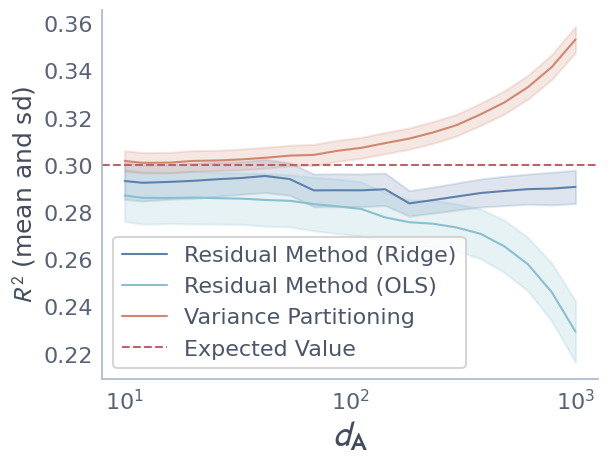

In [17]:
sns.lineplot(data=rm_shared_ridge, x='shared_dim', y='rm_ridge_x1_unique_score', label='Residual Method (Ridge)',
             errorbar='sd')
sns.lineplot(data=rm_shared, x='shared_dim', y='rm_x1_unique_score', label='Residual Method (OLS)', errorbar='sd')
sns.lineplot(data=vp_shared, x='shared_dim', y='vp_x1_unique_score', label='Variance Partitioning', errorbar='sd')
plt.axhline(0.3, linestyle='--', label='Expected Value', color="C3")
plt.xlabel(r"$d_\mathbf{A}$", fontsize=26)
plt.ylabel(r"$R^2$ (mean and sd)")
plt.xscale('log')
plt.legend(frameon=True)

# Unique dimension

In [11]:
d_list_list = [[d_list[0], int(dim), d_list[2]] for dim in varying_dim]

In [12]:
save_scores(d_list_list)

[100, 10, 100]
skipping, already exists
[100, 12, 100]
skipping, already exists
[100, 16, 100]
skipping, already exists
[100, 20, 100]
skipping, already exists
[100, 26, 100]
skipping, already exists
[100, 33, 100]
skipping, already exists
[100, 42, 100]
skipping, already exists
[100, 54, 100]
skipping, already exists
[100, 69, 100]
skipping, already exists
[100, 88, 100]
skipping, already exists
[100, 112, 100]
skipping, already exists
[100, 143, 100]
skipping, already exists
[100, 183, 100]
skipping, already exists
[100, 233, 100]
skipping, already exists
[100, 297, 100]
skipping, already exists
[100, 379, 100]
skipping, already exists
[100, 483, 100]
skipping, already exists
[100, 615, 100]
skipping, already exists
[100, 784, 100]
skipping, already exists
[100, 1000, 100]
skipping, already exists


In [13]:
vp_unique = pd.DataFrame()
rm_unique = pd.DataFrame()
rm_unique_ridge = pd.DataFrame()

for i, dim in enumerate(varying_dim):
    unique_dims = [d_list[0], dim, d_list[2]]
    scores = pd.read_csv(os.path.join(get_path(), f"scores_{unique_dims}.csv"))

    vp_unique_scores = pd.DataFrame({
        'unique_dim': [dim] * len(scores),
        'vp_x1_unique_score': scores['vp_x1_unique_score'],
    }, index=range(len(scores)))

    rm_unique_scores = pd.DataFrame({
        'unique_dim': [dim] * len(scores),
        'rm_x1_unique_score': scores['rm_x1_unique_score'],
    }, index=range(len(scores)))

    rm_unique_ridge_scores = pd.DataFrame({
        'unique_dim': [dim] * len(scores),
        'rm_ridge_x1_unique_score': scores['rm_ridge_x1_unique_score'],
    }, index=range(len(scores)))

    vp_unique = pd.concat([vp_unique, vp_unique_scores], ignore_index=True)
    rm_unique = pd.concat([rm_unique, rm_unique_scores], ignore_index=True)
    rm_unique_ridge = pd.concat([rm_unique_ridge, rm_unique_ridge_scores], ignore_index=True)

# combine shared and unique dimensions

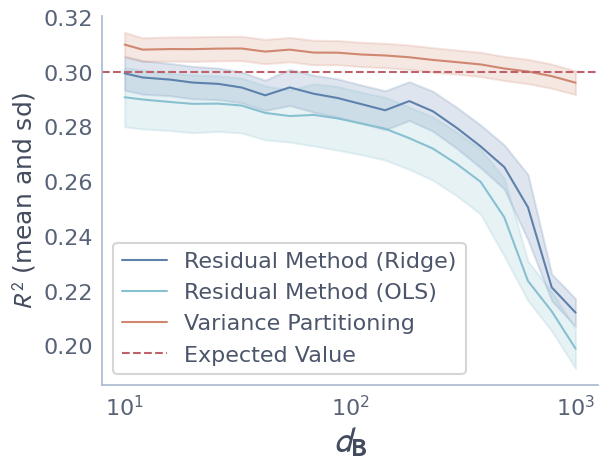

In [18]:
sns.lineplot(data=rm_unique_ridge, x='unique_dim', y='rm_ridge_x1_unique_score', label='Residual Method (Ridge)',
             errorbar='sd')
sns.lineplot(data=rm_unique, x='unique_dim', y='rm_x1_unique_score', label='Residual Method (OLS)', errorbar='sd')
sns.lineplot(data=vp_unique, x='unique_dim', y='vp_x1_unique_score', label='Variance Partitioning', errorbar='sd')
plt.axhline(0.3, linestyle='--', label='Expected Value', color="C3")
plt.xlabel(r"$d_\mathbf{B}$", fontsize=26)
plt.ylabel(r"$R^2$ (mean and sd)")
plt.xscale('log')
plt.legend(frameon=True)

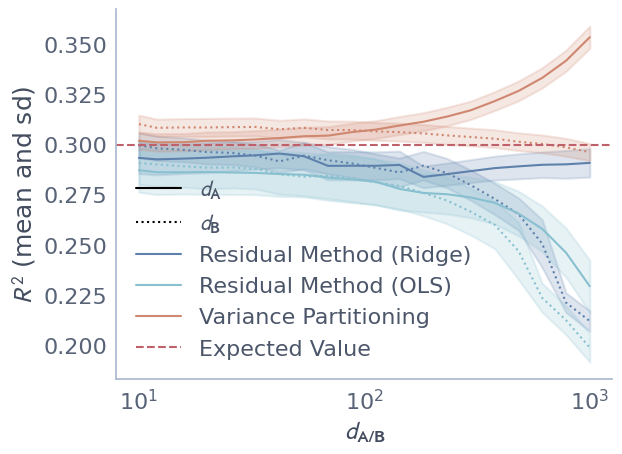

In [15]:
# add label for dotted lines
plt.plot([], [], linestyle='-', label=r'$d_\mathbf{A}$', color='black')
plt.plot([], [], linestyle=':', label=r'$d_\mathbf{B}$', color='black')

sns.lineplot(data=rm_shared_ridge, x='shared_dim', y='rm_ridge_x1_unique_score', label='Residual Method (Ridge)',
             errorbar='sd', color="C0")
sns.lineplot(data=rm_unique_ridge, x='unique_dim', y='rm_ridge_x1_unique_score', errorbar='sd', color="C0",
             linestyle=':')
sns.lineplot(data=rm_shared, x='shared_dim', y='rm_x1_unique_score', label='Residual Method (OLS)', errorbar='sd',
             color="C1")
sns.lineplot(data=rm_unique, x='unique_dim', y='rm_x1_unique_score', errorbar='sd', color="C1", linestyle=':')
sns.lineplot(data=vp_shared, x='shared_dim', y='vp_x1_unique_score', label='Variance Partitioning', errorbar='sd',
             color="C2", )
sns.lineplot(data=vp_unique, x='unique_dim', y='vp_x1_unique_score', errorbar='sd', color="C2", linestyle=':')


plt.axhline(0.3, linestyle='--', label='Expected Value', color="C3")
plt.xlabel(r"$d_\mathbf{A/B}$")
plt.ylabel(r"$R^2$ (mean and sd)")
plt.xscale('log')
plt.legend()